In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def load_json(path):
    records = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            records.append(json.loads(line))
    return pd.DataFrame(records)

DF = load_json('clean_messages.json')

DF['original_ts'] = pd.to_datetime(DF['original_timestamp'], utc=True, format='mixed')
DF['reply_ts'] = pd.to_datetime(DF['reply_timestamp'], utc=True, format='mixed')
DF['reply_delay'] = (DF['reply_ts'] - DF['original_ts']).dt.total_seconds()

total_pairs = len(DF)
unique_original_users = DF['original_user'].nunique()
unique_reply_users = DF['reply_user'].nunique()
channels_counts = DF['channel'].value_counts()

In [20]:
print(f"Total message-reply pairs: {total_pairs}")
print(f"Unique original authors: {unique_original_users}")
print(f"Unique repliers: {unique_reply_users}")
print("Channels by number of pairs:\n", channels_counts)

DF['original_len'] = DF['original_content'].str.len()
DF['reply_len'] = DF['reply_content'].str.len()

Total message-reply pairs: 27043
Unique original authors: 33
Unique repliers: 33
Channels by number of pairs:
 channel
программирование    27043
Name: count, dtype: int64


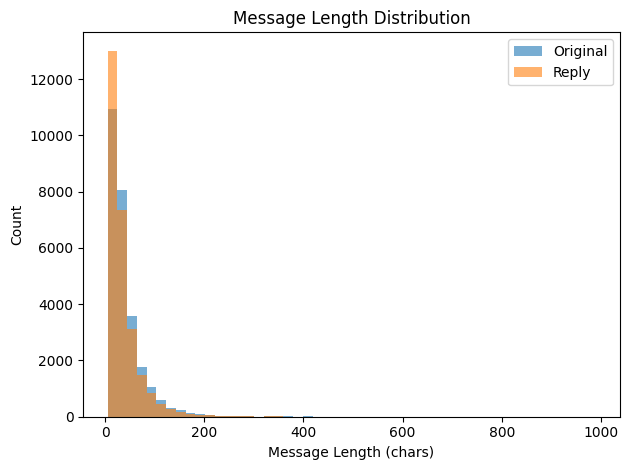

In [21]:
plt.figure()
plt.hist(DF['original_len'], bins=50, alpha=0.6, label='Original')
plt.hist(DF['reply_len'], bins=50, alpha=0.6, label='Reply')
plt.title('Message Length Distribution')
plt.xlabel('Message Length (chars)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()